# Importation de bibliothèques

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import scale
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

# Importation des données

In [11]:
data = pd.read_csv("tests_json.csv")

# Traitement des données

In [12]:
data = data[data["tier"] != "FU"]
X = data[["atk", "def", "hp", "sp_atk", "sp_def", "speed"]]
#X = scale(X)
y = data["tier"]

# Analyse discriminante

In [13]:
lda = LinearDiscriminantAnalysis(solver="eigen")
X_transformed = lda.fit_transform(X, y)
explained_variance = lda.explained_variance_ratio_
scalings = lda.scalings_

# Affichage des résultats

## Traitement des données

In [14]:
data_transformed = pd.DataFrame({
    "name": data["name"],
    "tier": data["tier"],
    "X": X_transformed[:, 0],
    "Y": X_transformed[:, 1]
})

## Inertie expliquée

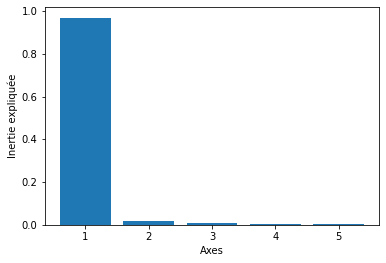

[0.96881899 0.01833019 0.00751477 0.00359546 0.0017406 ]


In [15]:
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel("Axes")
plt.ylabel("Inertie expliquée")
plt.show()
print(explained_variance)

## Nouvelles variables

In [16]:
pd.DataFrame(scalings[:, :5], index=["atk", "def", "hp", "sp_atk", "sp_def", "speed"], columns=[f"Axe {i}" for i in range(1, len(explained_variance) + 1)])

,Axe 1,Axe 2,Axe 3,Axe 4,Axe 5
atk,0.012277,-0.014049,0.006146,-0.015041,0.031627
def,0.011666,-0.004166,-0.021839,0.023573,-0.000095
hp,0.015569,-0.019230,0.012236,-0.005922,-0.025906
sp_atk,0.016033,-0.004101,-0.022868,0.001460,-0.014638
sp_def,0.010040,0.026601,0.005247,-0.031547,0.013314
speed,0.019683,0.015817,0.020223,0.026575,-0.000028


## Projection des données

### Sans les noms

In [17]:
px.scatter(data_transformed, x="X", y="Y", color="tier")

### Avec les noms

In [18]:
px.scatter(data_transformed, x="X", y="Y", color="tier", text="name")